In [1]:
from PIL import Image
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import os
import skimage.measure

1D Plots for:

- Global Variance
- Local Variance Difference
- Number of Edges
- Average Brightness of Edge
- Entropy
- Crofton Perimeter
- Standard Deviation

Examples For:

- Partial Derivatives
- Harris Edge Detection

# Get Image Files

In [2]:
blurry_ims = os.listdir('Blurry')
nonblurry_ims = os.listdir('Non-Blurry')

np.random.seed(0) #3
sample_size = 50
blurry_sample = np.random.choice(blurry_ims, size=sample_size, replace=False)
nonblurry_sample = np.random.choice(nonblurry_ims, size=50, replace=False)
print(blurry_sample)
print(nonblurry_sample)

['030FD_073975.jpg' '030FD_075150.jpg' '033SE_024150.jpg'
 '030FD_069300.jpg' '032SR_040975.jpg' '030FD_074050.jpg'
 '046TE_038450.jpg' '030FD_068675.jpg' '030FD_067625.jpg'
 '030FD_067125.jpg' '030FD_069750.jpg' '031HW_074025.jpg'
 '038RB_060475.jpg' '030FD_052850.jpg' '038RB_065475.jpg'
 '046TE_078850.jpg' '046TE_050825.jpg' '030FD_068150.jpg'
 '030FD_072925.jpg' '046TE_056100.jpg' '046TE_050675.jpg'
 '038RB_064725.jpg' '030FD_074200.jpg' '032SR_088150.jpg'
 '030FD_068100.jpg' '032SR_039325.jpg' '032SR_053875.jpg'
 '036MR_077125.jpg' '046TE_040975.jpg' '030FD_067650.jpg'
 '037SM_015200.jpg' '030FD_067700.jpg' '046TE_040900.jpg'
 '046TE_038225.jpg' '030FD_064375.jpg' '030FD_069150.jpg'
 '030FD_068925.jpg' '046TE_051300.jpg' '030FD_073275.jpg'
 '030FD_074950.jpg' '030FD_068600.jpg' '030FD_072850.jpg'
 '032SR_087700.jpg' '037SM_024775.jpg' '030FD_067900.jpg'
 '037SM_014800.jpg' '030FD_065425.jpg' '046TE_083100.jpg'
 '030FD_055775.jpg' '030FD_071525.jpg']
['043MP_023825.jpg' '030FD_07130

# Plot Global Variance

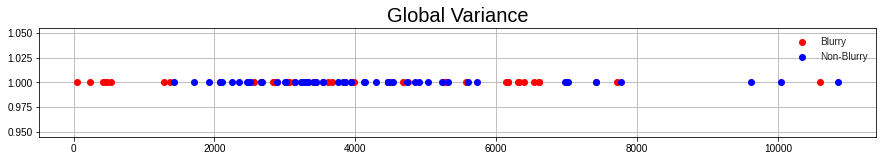

In [3]:
b_vars = np.zeros(sample_size)
nb_vars = np.zeros(sample_size)

for im in range(sample_size):
  blurry = Image.open("Blurry/"+blurry_sample[im])
  blurry = np.array(blurry)
  
  nonblurry = Image.open("Non-Blurry/"+nonblurry_sample[im])
  nonblurry = np.array(nonblurry)
  
  b_vars[im] = np.var(blurry.flatten())
  nb_vars[im] = np.var(nonblurry.flatten())

fig, ax = plt.subplots()
ax.plot(b_vars, [1]*len(b_vars), "ro", label="Blurry")
ax.plot(nb_vars, [1]*len(nb_vars), "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Global Variance", fontsize=20)
fig.set_size_inches(15,2)
ax.grid(True)
ax.legend()
fig.show()

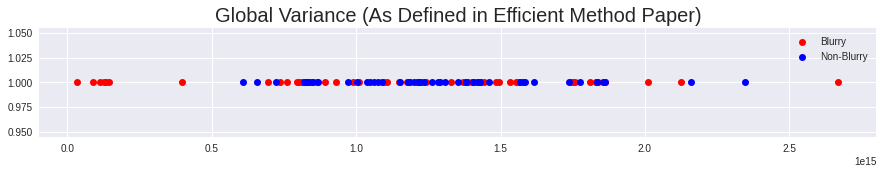

In [4]:
b_vars2 = np.zeros(sample_size)
nb_vars2 = np.zeros(sample_size)

for im in range(sample_size):
  blurry = Image.open("Blurry/"+blurry_sample[im])
  blurry = blurry.convert("L")
  blurry = np.array(blurry)
  
  nonblurry = Image.open("Non-Blurry/"+nonblurry_sample[im])
  nonblurry = nonblurry.convert("L")
  nonblurry = np.array(nonblurry)
  
  b_vars2[im] = sum((blurry.flatten() - np.linalg.norm(blurry.flatten()))**2) 
  nb_vars2[im] = sum((nonblurry.flatten() - np.linalg.norm(nonblurry.flatten()))**2) 

fig, ax = plt.subplots()
ax.plot(b_vars2, [1]*len(b_vars), "ro", label="Blurry")
ax.plot(nb_vars2, [1]*len(nb_vars), "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Global Variance (As Defined in Efficient Method Paper)", fontsize=20)
fig.set_size_inches(15,2)
ax.grid(True)
ax.legend()
fig.show()

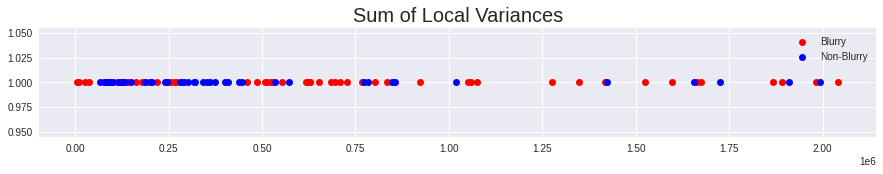

In [5]:
box_size = 40
b_lvars = []
nb_lvars = []

for im in range(sample_size):
  b_lvar = []
  nb_lvar = []
  blurry = Image.open("Blurry/"+blurry_sample[im])
  blurry = np.array(blurry)
  nonblurry = Image.open("Non-Blurry/"+nonblurry_sample[im])
  nonblurry = np.array(nonblurry)
  for i in range(round(480/box_size)):
    for j in range(round(640/box_size)):
      blur_sqr = blurry[i:i+40][j:j+40]
      blur_flat = blur_sqr.flatten()
      b_lvar.append(np.var(blur_flat))

      nonblur_sqr = nonblurry[i:i+40][j:j+40]
      nonblur_flat = nonblur_sqr.flatten()
      nb_lvar.append(np.var(nonblur_flat))
  b_lvars.append(sum(b_lvar))
  nb_lvars.append(sum(nb_lvar))

fig, ax = plt.subplots()
ax.plot(b_lvars, [1]*len(b_lvars), "ro", label="Blurry")
ax.plot(nb_lvars, [1]*len(nb_lvars), "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Sum of Local Variances", fontsize=20)
fig.set_size_inches(15,2)
ax.grid(True)
ax.legend()
fig.show()

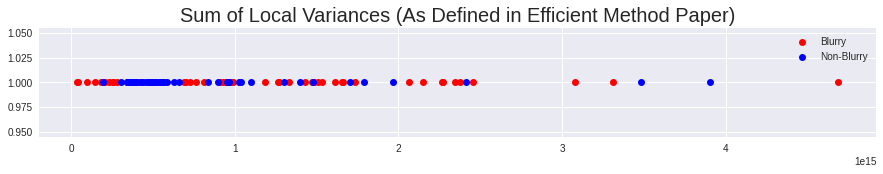

In [6]:
box_size = 40
b_lvars2 = []
nb_lvars2 = []

for im in range(sample_size):
  b_lvar = []
  nb_lvar = []
  blurry = Image.open("Blurry/"+blurry_sample[im])
  blurry = blurry.convert("L")
  blurry = np.array(blurry)
  nonblurry = Image.open("Non-Blurry/"+nonblurry_sample[im])
  nonblurry = nonblurry.convert("L")
  nonblurry = np.array(nonblurry)
  for i in range(round(480/box_size)):
    for j in range(round(640/box_size)):
      blur_sqr = blurry[i:i+40][j:j+40]
      blur_flat = blur_sqr.flatten()
      b_lvar.append(sum((blur_flat - np.linalg.norm(blur_flat)) ** 2))

      nonblur_sqr = nonblurry[i:i+40][j:j+40]
      nonblur_flat = nonblur_sqr.flatten()
      nb_lvar.append(sum((nonblur_flat - np.linalg.norm(nonblur_flat))** 2))
  b_lvars2.append(sum(b_lvar))
  nb_lvars2.append(sum(nb_lvar))

fig, ax = plt.subplots()
ax.plot(b_lvars2, [1]*len(b_lvars), "ro", label="Blurry")
ax.plot(nb_lvars2, [1]*len(nb_lvars), "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Sum of Local Variances (As Defined in Efficient Method Paper)", fontsize=20)
fig.set_size_inches(15,2)
ax.grid(True)
ax.legend()
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in sqrt


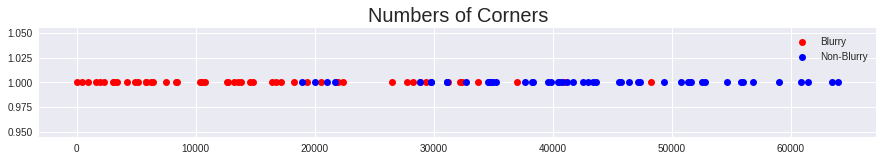

In [7]:
def element_oper(img1, img2, oper):
    ''' performs given element-by-element operation on 
        the two given images/matrices. '''
    if len(img1) != len(img2) or len(img1[0]) != len(img2[0]):
        print("Images must be the same size.")
    ret_mat = np.zeros((len(img1),len(img1[0])))
    for i in range(len(img1)):
        for j in range(len(img1[0])):
            p1 = img1[i, j]
            p2 = img2[i, j]
            ret_mat[i, j] = oper(p1,p2)
    return ret_mat

def find_min(v1, v2):
    ''' returns min of v1 and v2. Used to find min eigen-values. '''
    return min(v1, v2)

def harris_detection(I, T):
    ''' Implements harris corner detection algo. '''
    # used to find partial derivatives
    sobel_x = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
    sobel_y = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
    
    # used to calculate A, B, and C
    box = [[1,1,1,1,1],
           [1,1,1,1,1],
           [1,1,1,1,1],
           [1,1,1,1,1],
           [1,1,1,1,1]]
    
    # convert to grayscale
    I = I.convert("L")
    
    # convert to NP array, so we can have values > 255
    im_array = np.array(I)

    # find partial derivatives
    Ix = signal.fftconvolve(im_array, sobel_x)
    Iy = signal.fftconvolve(im_array, sobel_y)

    # find A, B, and C
    A = Ix * Ix
    A = signal.fftconvolve(A, box)
    B = Ix * Iy
    B = signal.fftconvolve(B, box)
    C = Iy * Iy
    C = signal.fftconvolve(C, box)
    # Find eigenvalues
    trace = A + C
    det = A*C-B*B

    half_trace = trace / 2
    S = (trace*trace / 4 - det) ** .5
    
    lambda1 = half_trace + S
    lambda2 = half_trace - S 
    
    # find minimum eigenvalues
    min_eigens = element_oper(lambda1, lambda2, find_min)
    
    corner_mat = np.zeros((len(min_eigens),len(min_eigens[0])))
    # Apply threshold
    for i in range(len(corner_mat)):
        for j in range(len(corner_mat[0])):
            p = min_eigens[i,j]
            if p > T:
                corner_mat[i,j] = min_eigens[i,j] 

    return corner_mat

def count_nonzero(corners):
  total = 0
  for i in range(len(corners)):
    for j in range(len(corners[0])):
      if corners[i][j] != 0:
        total+=1
  return total

b_corners = np.zeros(sample_size)
nb_corners = np.zeros(sample_size)

for im in range(sample_size):
  blur_corners = harris_detection(Image.open("Blurry/"+blurry_sample[im]), 5000)
  blur_corners = count_nonzero(blur_corners)
  nblur_corners = harris_detection(Image.open("Non-Blurry/"+nonblurry_sample[im]), 5000)
  nblur_corners = count_nonzero(nblur_corners)
  b_corners[im] = blur_corners
  nb_corners[im] = nblur_corners

fig, ax = plt.subplots()
ax.plot(b_corners, [1]*len(b_corners), "ro", label="Blurry")
ax.plot(nb_corners, [1]*len(nb_corners), "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Numbers of Corners", fontsize=20)
fig.set_size_inches(15,2)
ax.grid(True)
ax.legend()
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in sqrt


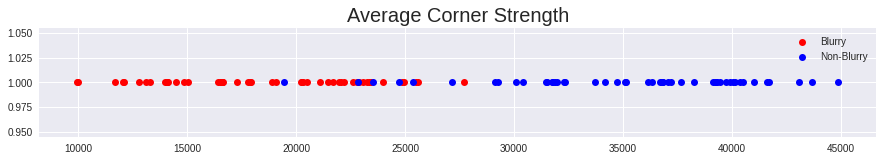

In [8]:
b_corneravg = np.zeros(sample_size)
nb_corneravg = np.zeros(sample_size)

for im in range(sample_size):
  blur = Image.open("Blurry/"+blurry_sample[im])
  blur_corner = harris_detection(blur, 5000)
  b_corneravg[im] = sum(blur_corner.flatten()) / b_corners[im]
  
  nblur = Image.open("Non-Blurry/"+nonblurry_sample[im])
  nblur_corner = harris_detection(nblur, 5000)
  nb_corneravg[im] = sum(nblur_corner.flatten()) / nb_corners[im]


fig, ax = plt.subplots()
ax.plot(b_corneravg, [1]*len(b_corneravg), "ro", label="Blurry")
ax.plot(nb_corneravg, [1]*len(nb_corneravg), "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Average Corner Strength", fontsize=20)
fig.set_size_inches(15,2)
ax.grid(True)
ax.legend()
fig.show()

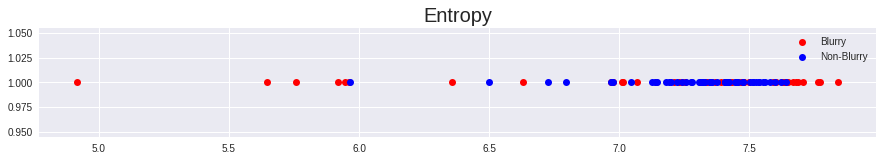

In [9]:
b_entropies = np.zeros(sample_size)
nb_entropies = np.zeros(sample_size)

for im in range(sample_size):
  blur = Image.open("Blurry/"+blurry_sample[im])
  blur = np.array(blur)
  b_entropies[im] = skimage.measure.shannon_entropy(blur.flatten())
  
  nblur = Image.open("Non-Blurry/"+nonblurry_sample[im])
  nblur = np.array(nblur)
  nb_entropies[im] = skimage.measure.shannon_entropy(nblur.flatten())

fig, ax = plt.subplots()
ax.plot(b_entropies, [1]*len(b_entropies), "ro", label="Blurry")
ax.plot(nb_entropies, [1]*len(nb_entropies), "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Entropy", fontsize=20)
fig.set_size_inches(15,2)
ax.grid(True)
ax.legend()
fig.show()

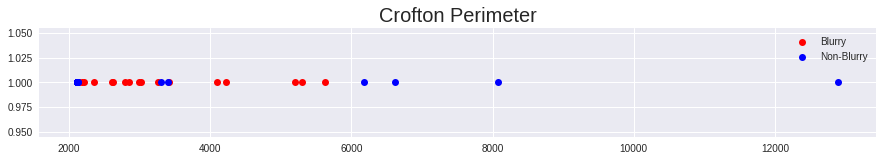

In [10]:
b_perims = np.zeros(sample_size)
nb_perims = np.zeros(sample_size)

for im in range(sample_size):
  blur = Image.open("Blurry/"+blurry_sample[im])
  blur = blur.convert("L")
  blur = np.array(blur)
  perim = skimage.measure.perimeter_crofton(blur)
  b_perims[im] = perim

  nblur = Image.open("Non-Blurry/"+nonblurry_sample[im])
  nblur = nblur.convert("L")
  nblur = np.array(nblur)
  perim = skimage.measure.perimeter_crofton(nblur)
  nb_perims[im] = perim

fig, ax = plt.subplots()
ax.plot(b_perims, [1]*len(b_entropies), "ro", label="Blurry")
ax.plot(nb_perims, [1]*len(nb_entropies), "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Crofton Perimeter", fontsize=20)
fig.set_size_inches(15,2)
ax.grid(True)
ax.legend()
fig.show()

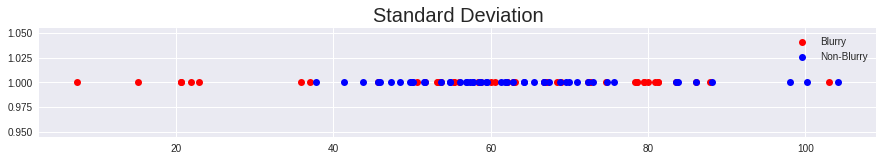

In [11]:
b_stds = np.zeros(sample_size)
nb_stds = np.zeros(sample_size)

for im in range(sample_size):
  blur = Image.open("Blurry/"+blurry_sample[im])
  blur = np.array(blur)
  std = np.std(blur.flatten())
  b_stds[im] = std

  nblur = Image.open("Non-Blurry/"+nonblurry_sample[im])
  nblur = np.array(nblur)
  std = np.std(nblur.flatten())
  nb_stds[im] = std

fig, ax = plt.subplots()
ax.plot(b_stds, [1]*len(b_entropies), "ro", label="Blurry")
ax.plot(nb_stds, [1]*len(nb_entropies), "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Standard Deviation", fontsize=20)
fig.set_size_inches(15,2)
ax.grid(True)
ax.legend()
fig.show()

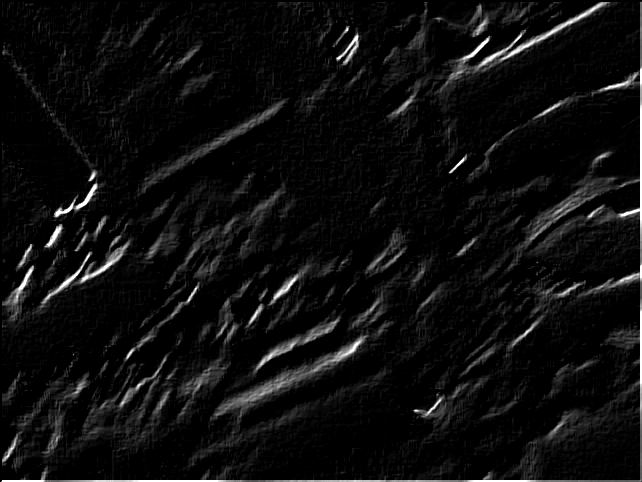

In [12]:
blur = Image.open("Blurry/"+blurry_sample[0])
blur = blur.convert("L")
blur = np.array(blur)
py = signal.fftconvolve(blur, [[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
px = signal.fftconvolve(blur, [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
p = py + px
p = Image.fromarray(p)
p = p.convert("RGB")
p

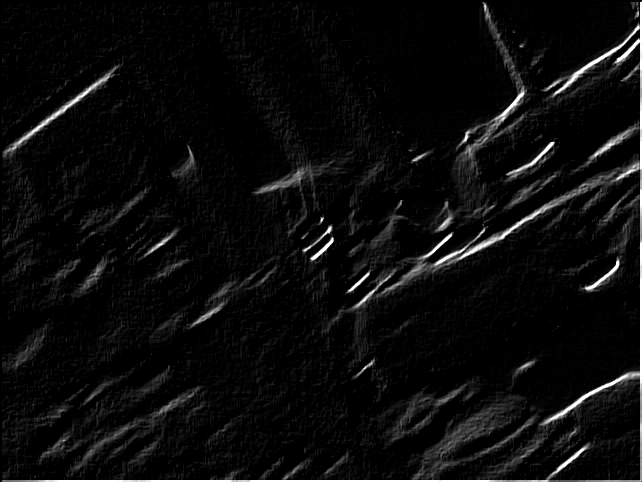

In [13]:
blur = Image.open("Blurry/"+blurry_sample[1])
blur = blur.convert("L")
blur = np.array(blur)
py = signal.fftconvolve(blur, [[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
px = signal.fftconvolve(blur, [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
p = py + px
p = Image.fromarray(p)
p = p.convert("RGB")
p

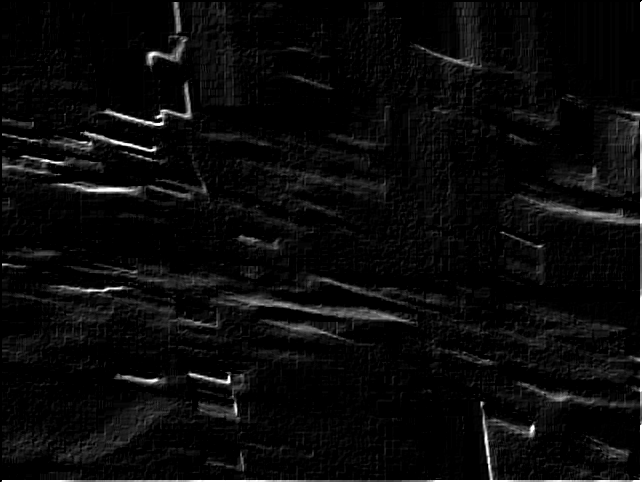

In [14]:
blur = Image.open("Blurry/"+blurry_sample[3])
blur = blur.convert("L")
blur = np.array(blur)
py = signal.fftconvolve(blur, [[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
px = signal.fftconvolve(blur, [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
p = py + px
p = Image.fromarray(p)
p = p.convert("RGB")
p

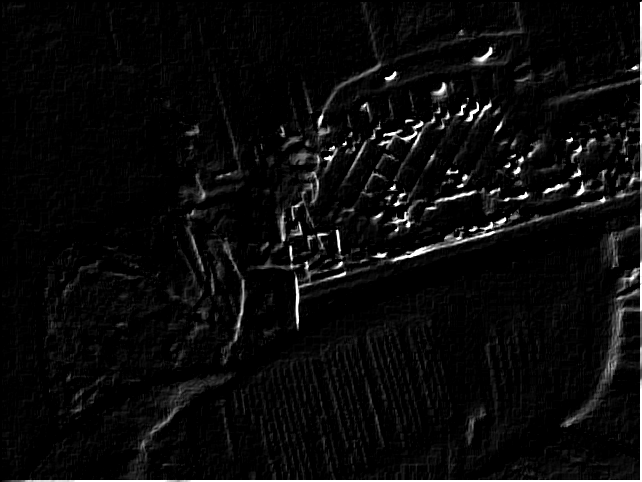

In [15]:
nonblur = Image.open("Non-Blurry/"+nonblurry_sample[1])
nonblur = nonblur.convert("L")
nonblur = np.array(nonblur)
py = signal.fftconvolve(nonblur, [[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
px = signal.fftconvolve(nonblur, [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
p = py + px
p = Image.fromarray(p)
p = p.convert("RGB")
p

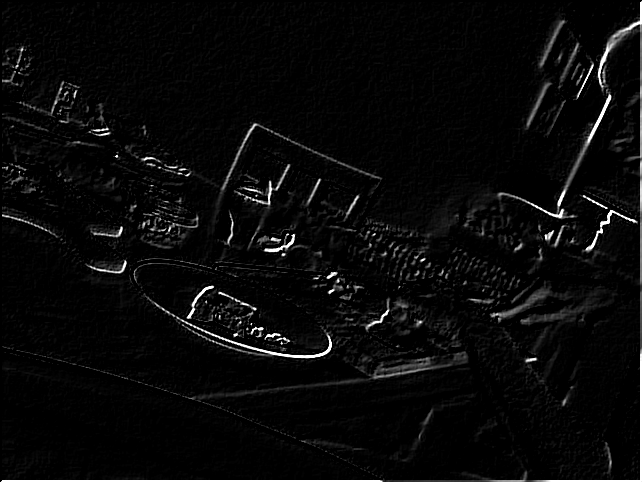

In [16]:
nonblur = Image.open("Non-Blurry/"+nonblurry_sample[0])
nonblur = nonblur.convert("L")
nonblur = np.array(nonblur)
py = signal.fftconvolve(nonblur, [[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
px = signal.fftconvolve(nonblur, [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
p = py + px
p = Image.fromarray(p)
p = p.convert("RGB")
p

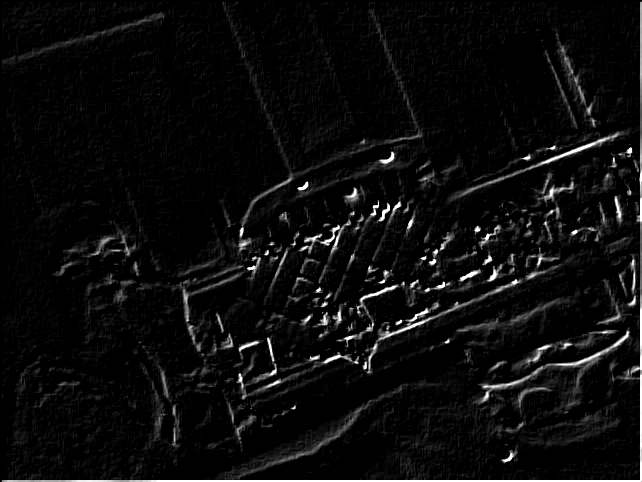

In [17]:
nonblur = Image.open("Non-Blurry/"+nonblurry_sample[2])
nonblur = nonblur.convert("L")
nonblur = np.array(nonblur)
py = signal.fftconvolve(nonblur, [[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
px = signal.fftconvolve(nonblur, [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
p = py + px
p = Image.fromarray(p)
p = p.convert("RGB")
p

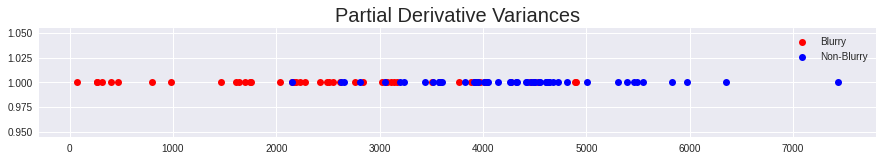

In [18]:
b_varps = np.zeros(sample_size)
nb_varps = np.zeros(sample_size)

for im in range(sample_size):
  blur = Image.open("Blurry/"+blurry_sample[im])
  blur = blur.convert("L")
  blur = np.array(blur)
  px = signal.fftconvolve(blur, [[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
  py = signal.fftconvolve(blur, [[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
  p = px + py
  avg_p = np.var(p.flatten())
  b_varps[im] = avg_p

  nblur = Image.open("Non-Blurry/"+nonblurry_sample[im])
  nblur = nblur.convert("L")
  nblur = np.array(nblur)
  px = signal.fftconvolve(nblur, [[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
  py = signal.fftconvolve(nblur, [[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
  p = px + py
  avg_p = np.var(p.flatten())
  nb_varps[im] = avg_p

fig, ax = plt.subplots()
ax.plot(b_varps, [1]*len(b_entropies), "ro", label="Blurry")
ax.plot(nb_varps, [1]*len(nb_entropies), "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Partial Derivative Variances", fontsize=20)
fig.set_size_inches(15,2)
ax.grid(True)
ax.legend()
fig.show()

In [19]:
blurry_stats = [b_vars, b_vars2, b_lvars, b_lvars2, b_corners, b_corneravg, b_entropies, b_perims, b_stds, b_varps]
nonblurry_stats = [nb_vars, nb_vars2, nb_lvars, nb_lvars2, nb_corners, nb_corneravg, nb_entropies, nb_perims, nb_stds, nb_varps]

def data_from_lists(blurry, nonblurry):
  X = []
  y = []
  for im in range(len(blurry[0])): # 25 
    b_entry = []
    nb_entry = []
    for stat in range(len(blurry)):
      b_entry.append(blurry[stat][im] / max( max(blurry[stat]), max(nonblurry[stat])  ))
      nb_entry.append(nonblurry[stat][im] / max( max(blurry[stat]), max(nonblurry[stat]) ))
    X.append(b_entry)
    X.append(nb_entry)

  for data in range(sample_size):
    y.append(1)
    y.append(0)

  return X, y

X, y = data_from_lists(blurry_stats, nonblurry_stats)

In [20]:
##################################################
        # RANK FEATURE IMPORTANCES #
##################################################

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

regr = RandomForestClassifier(max_depth=2, random_state=0)
regr.fit(X, y)
feats = ["Variance", "EM Variance", "Sum of Local Variances", "EM Sum of Local Variances", "Number of Corners", 
         "Average Corner Strength", "Entropy", "Crofton Perimeter", "Standard Deviation", "Partial Derivative Variance"]
imps = regr.feature_importances_

for i in range(len(feats)):
  print(feats[i], ": ", round(imps[i], 2))

Variance :  0.01
EM Variance :  0.0
Sum of Local Variances :  0.06
EM Sum of Local Variances :  0.04
Number of Corners :  0.22
Average Corner Strength :  0.43
Entropy :  0.02
Crofton Perimeter :  0.02
Standard Deviation :  0.01
Partial Derivative Variance :  0.17


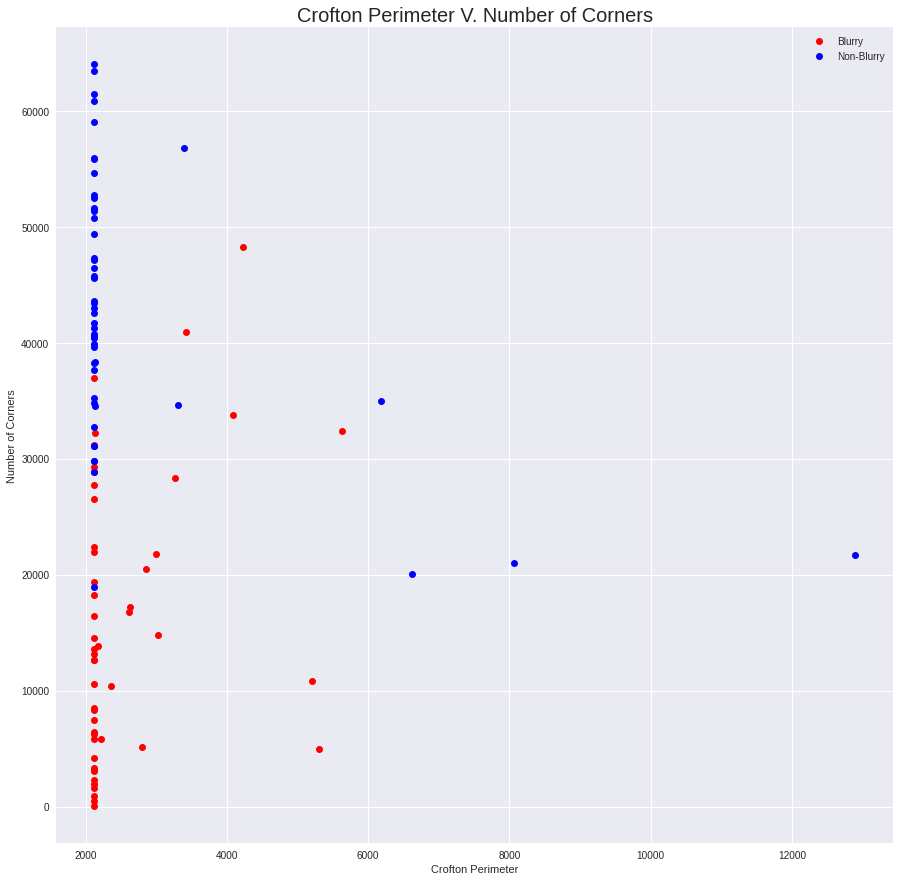

In [21]:
fig, ax = plt.subplots()
ax.plot(b_perims, b_corners, "ro", label="Blurry")
ax.plot(nb_perims, nb_corners, "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Crofton Perimeter V. Number of Corners", fontsize=20)
plt.xlabel("Crofton Perimeter")
plt.ylabel("Number of Corners")
fig.set_size_inches(15,15)
ax.grid(True)
ax.legend()
fig.show()

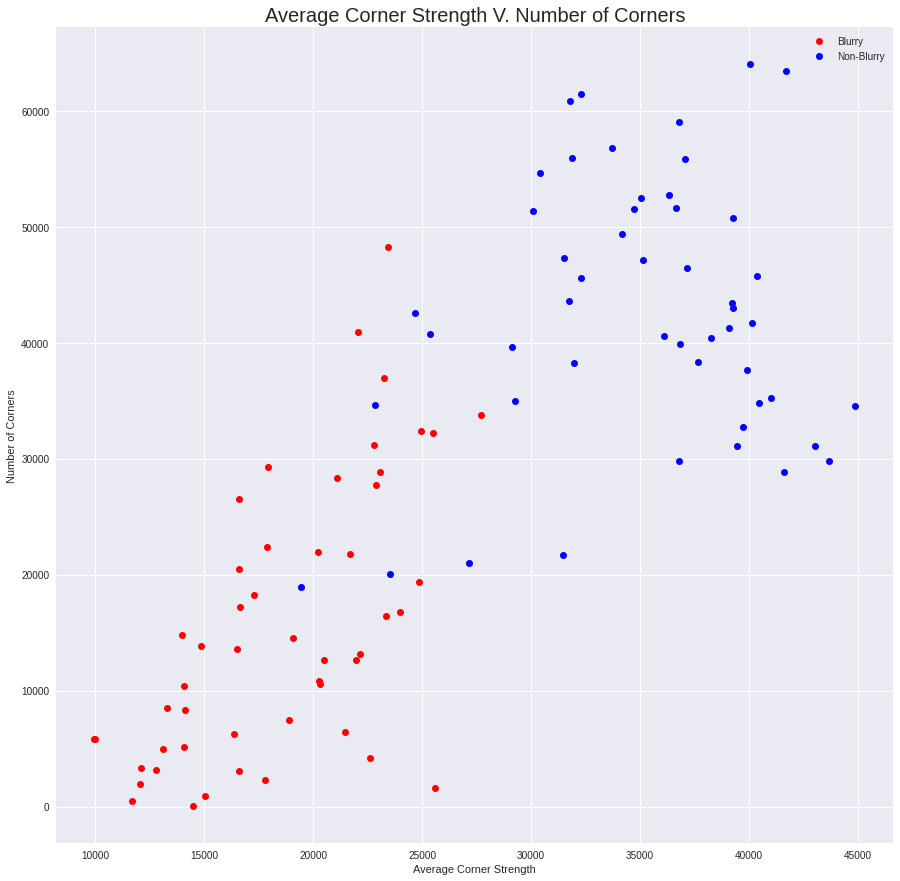

In [22]:
fig, ax = plt.subplots()
ax.plot(b_corneravg, b_corners, "ro", label="Blurry")
ax.plot(nb_corneravg, nb_corners, "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Average Corner Strength V. Number of Corners", fontsize=20)
plt.xlabel("Average Corner Strength")
plt.ylabel("Number of Corners")
fig.set_size_inches(15,15)
ax.grid(True)
ax.legend()
fig.show()

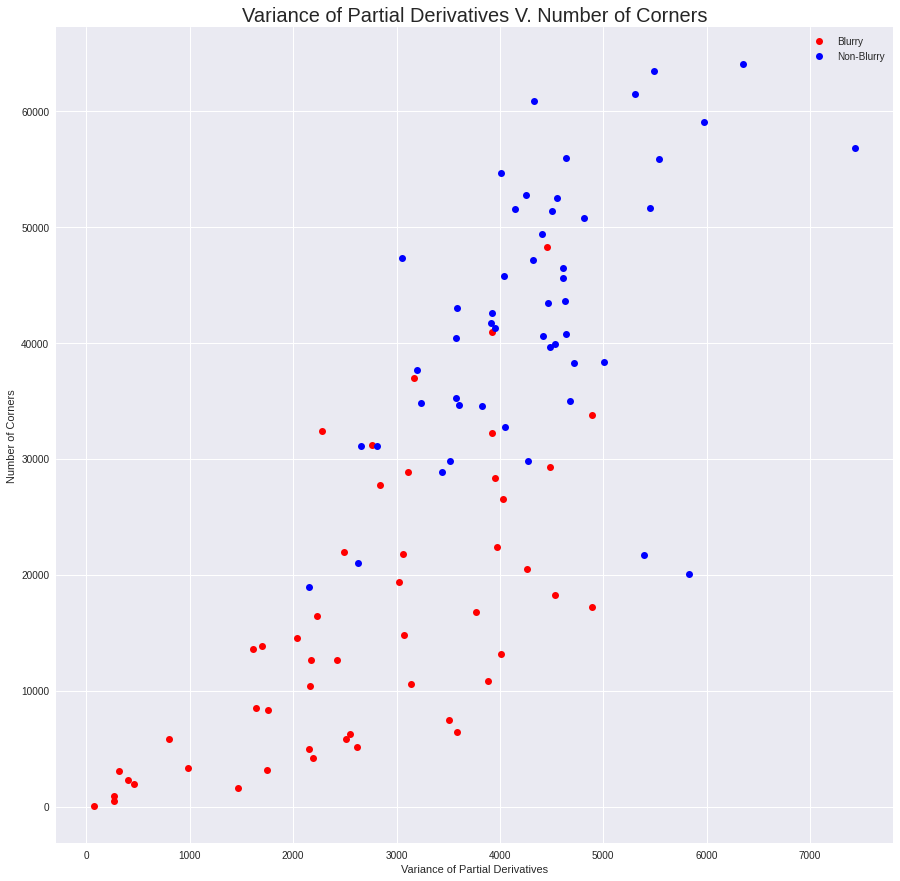

In [23]:
fig, ax = plt.subplots()
ax.plot(b_varps, b_corners, "ro", label="Blurry")
ax.plot(nb_varps, nb_corners, "bo", label="Non-Blurry")
plt.style.use('seaborn')
plt.title("Variance of Partial Derivatives V. Number of Corners", fontsize=20)
plt.xlabel("Variance of Partial Derivatives")
plt.ylabel("Number of Corners")
fig.set_size_inches(15,15)
ax.grid(True)
ax.legend()
fig.show()

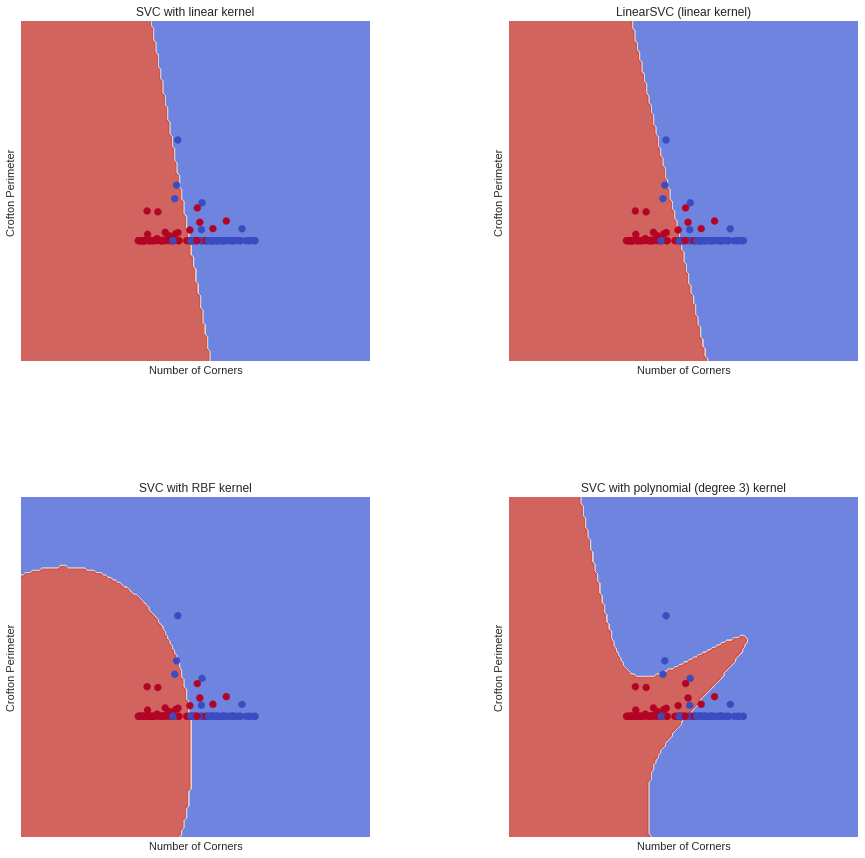

In [24]:
# https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

X, y = data_from_lists([b_corners, b_perims], [nb_corners, nb_perims])
X = np.array(X)
y = np.array(y)

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(15,15))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Number of Corners')
    plt.ylabel('Crofton Perimeter')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

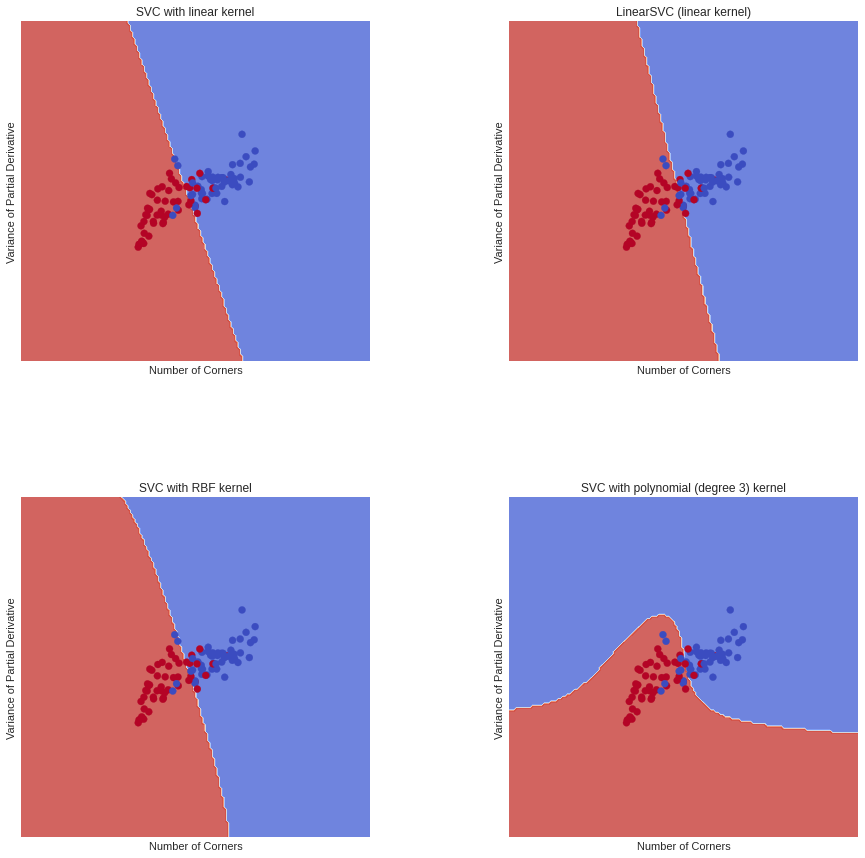

In [25]:
# https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

X, y = data_from_lists([b_corners, b_varps], [nb_corners, nb_varps])
X = np.array(X)
y = np.array(y)

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(15,15))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Number of Corners')
    plt.ylabel('Variance of Partial Derivative')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

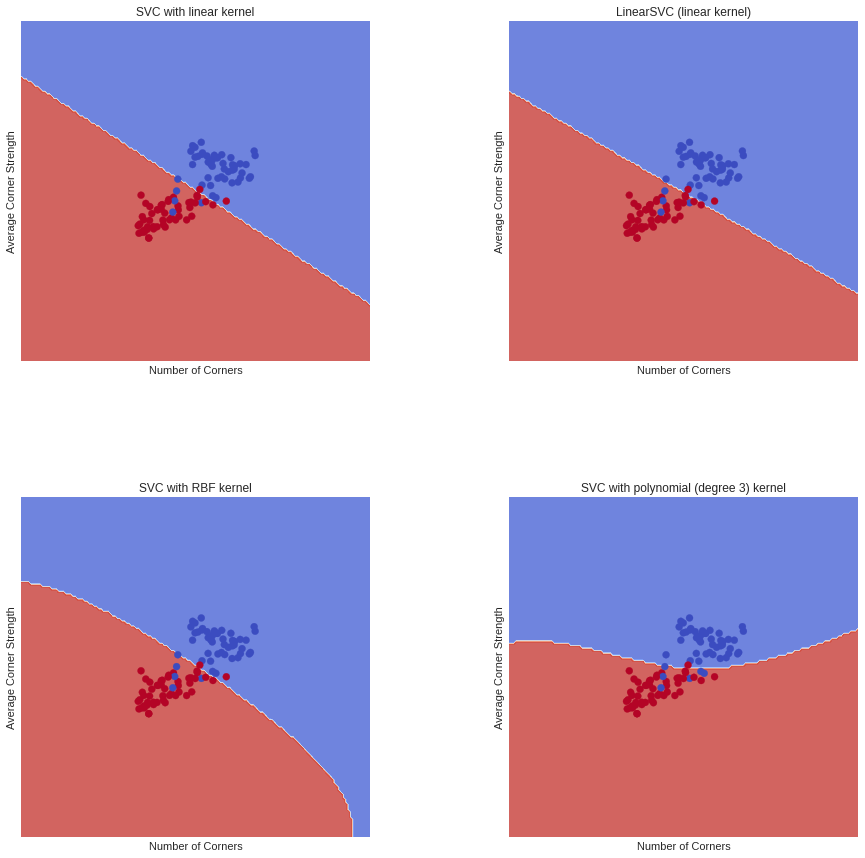

In [26]:
# https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

X, y = data_from_lists([b_corners, b_corneravg], [nb_corners, nb_corneravg])
X = np.array(X)
y = np.array(y)

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(15,15))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Number of Corners')
    plt.ylabel('Average Corner Strength')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()